# WM binding

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import loadmat
import os


## Load data

### Loading MATLAB objects

Reading .mat files can be achieved either through scipy.io.loadmat (well maintained, but only loads simple structs) or pymatreader.read_mat (supports all types of objects). What you will typically end up with is a dictionary of values or NumPy arrays

In [24]:
# Load the mat file
mat = loadmat(r'D:\neuro1\code\psychophysics\WM_binding_pilot\data\P108CS_session_2_WM_binding_2025425_11056_datMat')['datMat']
variableNames = [
    'trial',
    'rt',
    'acc',
    'key',
    't_pre_stim',
    't_delay1',
    't_delay2',
    'first_cat',
    'second_cat',
    'first_num',
    'second_num',
    'first_pic',
    'second_pic',
    'probe_cat',
    'probe_pic',
    'probe_validity',
    'probe_num',
    'correct_answer'
]
# Convert numpy array to dataframe using the variableNames
df = pd.DataFrame(mat, columns=variableNames)
# df.convert_dtypes()

### OR Load the CSV file

In [21]:
# OR Load the CSV file
# Get all CSV files in the current directory and sort them
csv_files = sorted([f for f in os.listdir('.') if f.endswith('.csv')])
print("Available CSV files:", csv_files)
# Create a dictionary to store dataframes
dfs = {}

# Read each CSV file and store in the dictionary
for csv_file in csv_files:
    # Get name without .csv extension to use as key
    name = csv_file.replace('.csv', '')
    # Read the CSV file into a dataframe
    dfs[name] = pd.read_csv(csv_file)
    print(f"Loaded {csv_file}")

Available CSV files: ['P106_behfile.csv', 'P107_behfile.csv', 'P108_behfile.csv', 'P108_behfile_1.csv']
Loaded P106_behfile.csv
Loaded P107_behfile.csv
Loaded P108_behfile.csv
Loaded P108_behfile_1.csv


## Format data

### load a single file (optional)

In [5]:
# Print available dataframes and let user choose which one to load
if dfs:  # Check if dictionary is not empty
    print("\nAvailable dataframes:")
    for i, name in enumerate(dfs.keys()):
        print(f"{i}: {name}")
    
    # Get user input for which dataframe to load
    choice = int(input("\nEnter the number of the dataframe you want to load: "))
    df_name = list(dfs.keys())[choice]
    df = dfs[df_name]
    print(f"\nLoaded dataframe: {df_name}")
else:
    print("No dataframes found in dictionary")



Available dataframes:
0: P107_behfile
1: P108_behfile_1
2: P108_behfile
3: P106_behfile

Loaded dataframe: P107_behfile


### Use all files

In [22]:
# Process all dataframes
for df_name, df in dfs.items():
    print(f"\nProcessing dataframe: {df_name}")
    # Ensure the relevant columns are numeric
    df['rt'] = pd.to_numeric(df['rt'], errors='coerce')
    df['acc'] = pd.to_numeric(df['acc'], errors='coerce')
    df['probe_validity'] = pd.to_numeric(df['probe_validity'], errors='coerce')

    # Compute a 10-trial sliding window mean for reaction time
    df['rt_sliding_mean'] = df['rt'].rolling(window=10).mean()

    # Ensure first_pic and second_pic are strings so we can extract the last two digits
    df['first_pic'] = df['first_pic'].astype(str)
    df['second_pic'] = df['second_pic'].astype(str)

    # Define a function to extract the number from a picture ID
    def extract_number(pic_val):
        try:
            # Convert the picture value to float and then to int
            pic_int = int(float(pic_val))
            pic_str = str(pic_int)
            # Extract the last two digits
            last_two = int(pic_str[-2:])
        except Exception as e:
            return np.nan
        # Apply the rule: 10-19 -> 1, 20-29 -> 5; otherwise NaN
        if 10 <= last_two <= 19:
            return 1
        elif 20 <= last_two <= 29:
            return 5
        else:
            return np.nan

    # Generate first_num and second_num based on first_pic and second_pic
    df['first_num'] = df['first_pic'].apply(extract_number)
    df['second_num'] = df['second_pic'].apply(extract_number)
    
    # Update the dataframe in the dictionary
    dfs[df_name] = df


Processing dataframe: P106_behfile

Processing dataframe: P107_behfile

Processing dataframe: P108_behfile

Processing dataframe: P108_behfile_1


## RT


Plotting for dataframe: P106_behfile


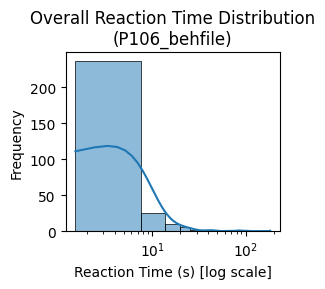

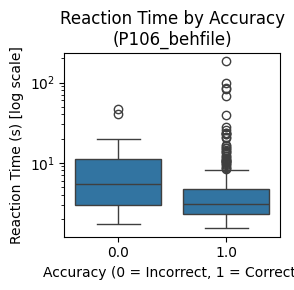

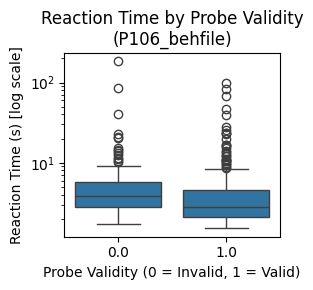

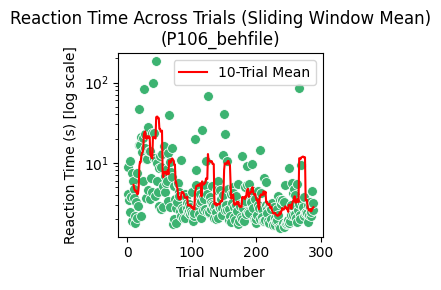


Plotting for dataframe: P107_behfile


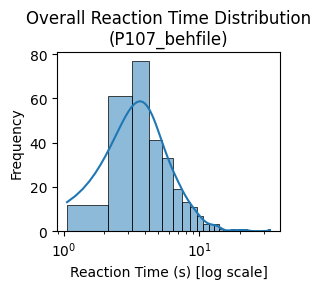

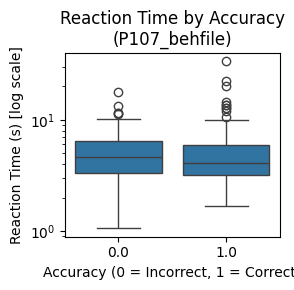

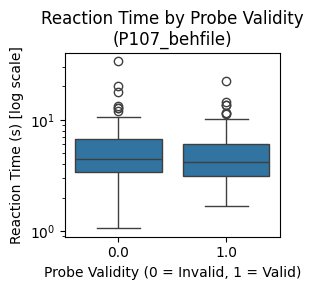

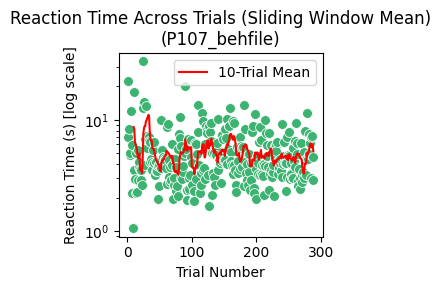


Plotting for dataframe: P108_behfile


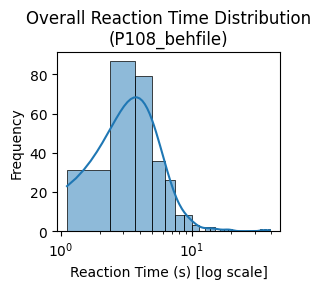

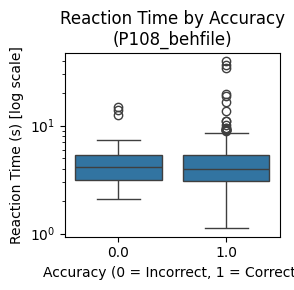

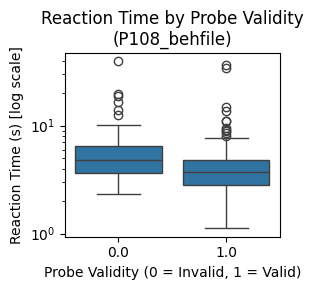

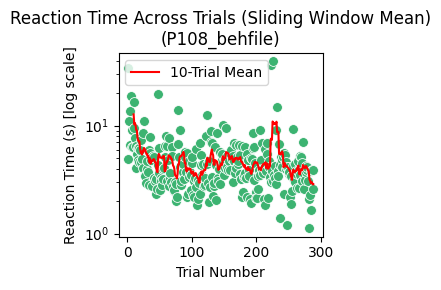


Plotting for dataframe: P108_behfile_1


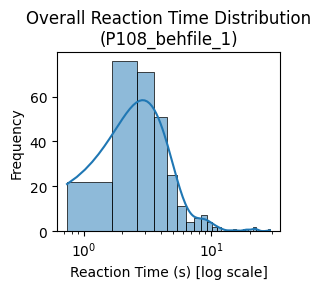

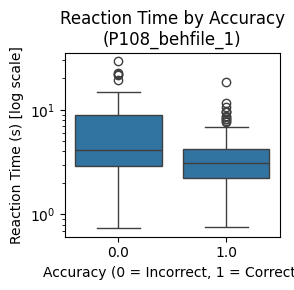

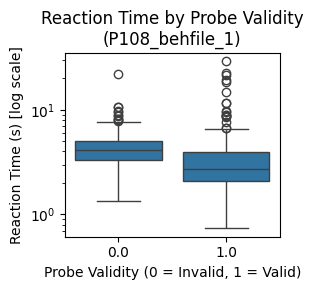

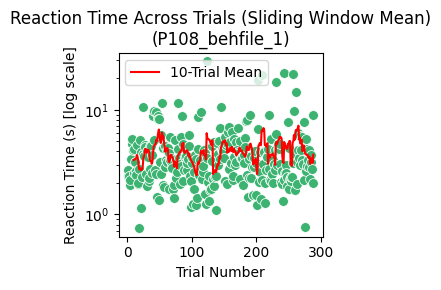

In [23]:
# ---- Per-DataFrame Plots ----
for df_name, df in dfs.items():
    print(f"\nPlotting for dataframe: {df_name}")

    # 1. Overall RT Distribution
    plt.figure(figsize=(3, 3))
    sns.histplot(df['rt'], bins=30, kde=True)
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.title(f'Overall Reaction Time Distribution\n({df_name})')
    plt.xlabel('Reaction Time (s) [log scale]')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # 2. RT by Accuracy
    plt.figure(figsize=(3, 3))
    sns.boxplot(x='acc', y='rt', data=df)
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title(f'Reaction Time by Accuracy\n({df_name})')
    plt.xlabel('Accuracy (0 = Incorrect, 1 = Correct)')
    plt.ylabel('Reaction Time (s) [log scale]')
    plt.tight_layout()
    plt.show()

    # 3. RT by Probe Validity
    plt.figure(figsize=(3, 3))
    sns.boxplot(x='probe_validity', y='rt', data=df)
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title(f'Reaction Time by Probe Validity\n({df_name})')
    plt.xlabel('Probe Validity (0 = Invalid, 1 = Valid)')
    plt.ylabel('Reaction Time (s) [log scale]')
    plt.tight_layout()
    plt.show()

    # 4. Reaction Time Across Trials
    plt.figure(figsize=(3, 3))
    sns.scatterplot(x='trial', y='rt', data=df, color='mediumseagreen', s=50)
    sns.lineplot(x='trial', y='rt_sliding_mean', data=df, color='red', label="10-Trial Mean", errorbar=None)
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title(f"Reaction Time Across Trials (Sliding Window Mean)\n({df_name})")
    plt.xlabel("Trial Number")
    plt.ylabel("Reaction Time (s) [log scale]")
    plt.tight_layout()
    plt.show()



Summary Statistics:
                mean_rt  median_rt  std_rt  accuracy  valid_rt  invalid_rt  \
P106_behfile      6.901      3.107  15.165     0.896     6.208       8.288   
P107_behfile      5.179      4.175   3.352     0.653     4.905       5.728   
P108_behfile      4.949      4.005   4.133     0.899     4.446       5.954   
P108_behfile_1    4.053      3.189   3.403     0.837     3.776       4.608   

                valid_acc  invalid_acc  
P106_behfile        0.932        0.823  
P107_behfile        0.776        0.406  
P108_behfile        0.932        0.833  
P108_behfile_1      0.849        0.812  


/var/folders/m6/4rb3n3zn5l9826lx67t897qm0000gn/T/ipykernel_95030/3868047703.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Session')


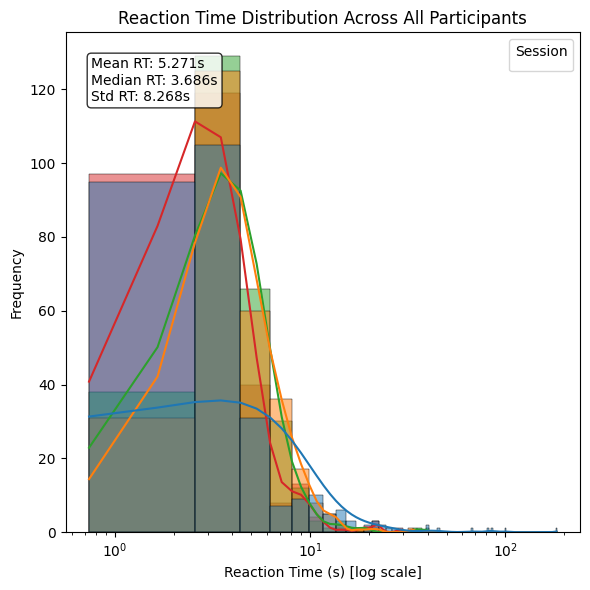

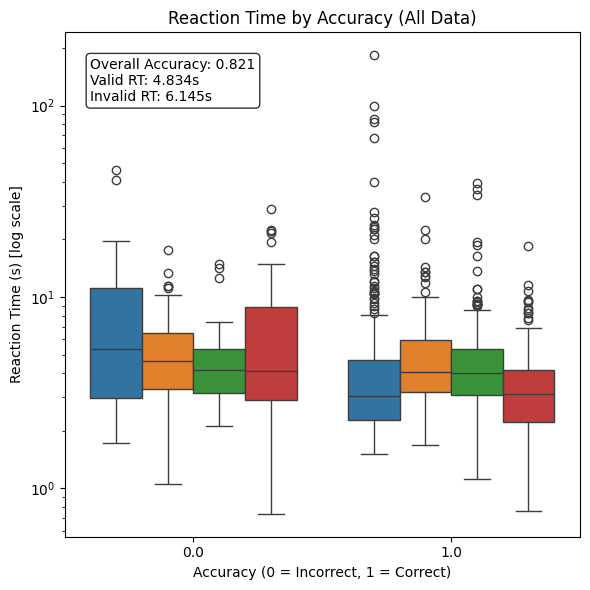

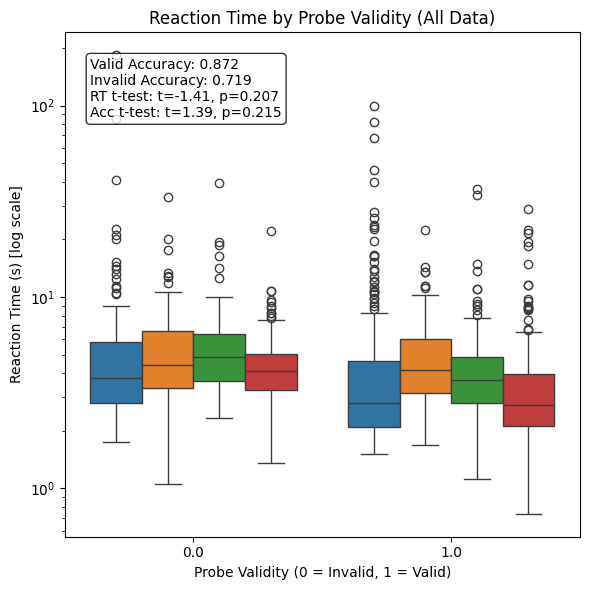

In [40]:

# Calculate statistics for each dataframe
stats = {}
for df_name, df in dfs.items():
    # Basic statistics
    stats[df_name] = {
        'mean_rt': df['rt'].mean(),
        'median_rt': df['rt'].median(),
        'std_rt': df['rt'].std(),
        'accuracy': df['acc'].mean(),
        'valid_rt': df[df['probe_validity'] == 1]['rt'].mean(),
        'invalid_rt': df[df['probe_validity'] == 0]['rt'].mean(),
        'valid_acc': df[df['probe_validity'] == 1]['acc'].mean(),
        'invalid_acc': df[df['probe_validity'] == 0]['acc'].mean()
    }

# Create a summary DataFrame
stats_df = pd.DataFrame(stats).T
print("\nSummary Statistics:")
print(stats_df.round(3))

# Concatenate all dataframes for group-level plots
all_df = pd.concat(dfs.values(), keys=dfs.keys(), names=['df_name']).reset_index(level=0)

# Calculate overall statistics
overall_stats = {
    'mean_rt': all_df['rt'].mean(),
    'median_rt': all_df['rt'].median(),
    'std_rt': all_df['rt'].std(),
    'accuracy': all_df['acc'].mean(),
    'valid_rt': all_df[all_df['probe_validity'] == 1]['rt'].mean(),
    'invalid_rt': all_df[all_df['probe_validity'] == 0]['rt'].mean(),
    'valid_acc': all_df[all_df['probe_validity'] == 1]['acc'].mean(),
    'invalid_acc': all_df[all_df['probe_validity'] == 0]['acc'].mean()
}

# Perform t-tests
from scipy import stats as scipy_stats

# Calculate mean RT and accuracy for each session
session_stats = all_df.groupby(['df_name', 'probe_validity']).agg({
    'rt': 'mean',
    'acc': 'mean'
}).reset_index()

# T-test for valid vs invalid RT using session means
valid_rt = session_stats[session_stats['probe_validity'] == 1]['rt']
invalid_rt = session_stats[session_stats['probe_validity'] == 0]['rt']
rt_ttest = scipy_stats.ttest_ind(valid_rt, invalid_rt)

# T-test for valid vs invalid accuracy using session means
valid_acc = session_stats[session_stats['probe_validity'] == 1]['acc']
invalid_acc = session_stats[session_stats['probe_validity'] == 0]['acc']
acc_ttest = scipy_stats.ttest_ind(valid_acc, invalid_acc)

# 1. Overall RT Distribution
plt.figure(figsize=(6, 6))
sns.histplot(data=all_df, x='rt', hue='df_name', bins=100, kde=True, alpha=0.5)
plt.xscale('log')
plt.title('Reaction Time Distribution Across All Participants')
plt.xlabel('Reaction Time (s) [log scale]')
plt.ylabel('Frequency')
stats_text = f"Mean RT: {overall_stats['mean_rt']:.3f}s\n"
stats_text += f"Median RT: {overall_stats['median_rt']:.3f}s\n"
stats_text += f"Std RT: {overall_stats['std_rt']:.3f}s"
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.legend(title='Session')
plt.tight_layout()
plt.show()

# 2. RT by Accuracy
plt.figure(figsize=(6, 6))
sns.boxplot(x='acc', y='rt', hue='df_name', data=all_df)
plt.yscale('log')
plt.title('Reaction Time by Accuracy (All Data)')
plt.xlabel('Accuracy (0 = Incorrect, 1 = Correct)')
plt.ylabel('Reaction Time (s) [log scale]')
stats_text = f"Overall Accuracy: {overall_stats['accuracy']:.3f}\n"
stats_text += f"Valid RT: {overall_stats['valid_rt']:.3f}s\n"
stats_text += f"Invalid RT: {overall_stats['invalid_rt']:.3f}s"
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.legend().remove()
plt.tight_layout()
plt.show()

# 3. RT by Probe Validity
plt.figure(figsize=(6, 6))
sns.boxplot(x='probe_validity', y='rt', hue='df_name', data=all_df)
plt.yscale('log')
plt.title('Reaction Time by Probe Validity (All Data)')
plt.xlabel('Probe Validity (0 = Invalid, 1 = Valid)')
plt.ylabel('Reaction Time (s) [log scale]')
stats_text = f"Valid Accuracy: {overall_stats['valid_acc']:.3f}\n"
stats_text += f"Invalid Accuracy: {overall_stats['invalid_acc']:.3f}\n"
stats_text += f"RT t-test: t={rt_ttest.statistic:.2f}, p={rt_ttest.pvalue:.3f}\n"
stats_text += f"Acc t-test: t={acc_ttest.statistic:.2f}, p={acc_ttest.pvalue:.3f}"
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.legend().remove()
plt.tight_layout()
plt.show()



Behavioral Performance with Statistics:
               participant  session  valid_rt  valid_acc  invalid_rt  \
P106_behfile          P106        1     6.208      0.932       8.288   
P107_behfile          P107        1     4.905      0.776       5.728   
P108_behfile          P108        1     4.446      0.932       5.954   
P108_behfile_1        P108        2     3.776      0.849       4.608   

                invalid_acc  rt_cost  acc_cost   rt_d   rt_p  acc_d  acc_p  
P106_behfile          0.823    2.080     0.109  0.125  0.273  0.189  0.008  
P107_behfile          0.406    0.824     0.370  0.228  0.049  0.426  0.000  
P108_behfile          0.833    1.508     0.099  0.357  0.003  0.173  0.015  
P108_behfile_1        0.812    0.832     0.036  0.258  0.050  0.054  0.535  

RT Mixed-Effects Model:
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: rt        
No. Observations: 1152    Method:             REML      
No. Groups:       3       Sc

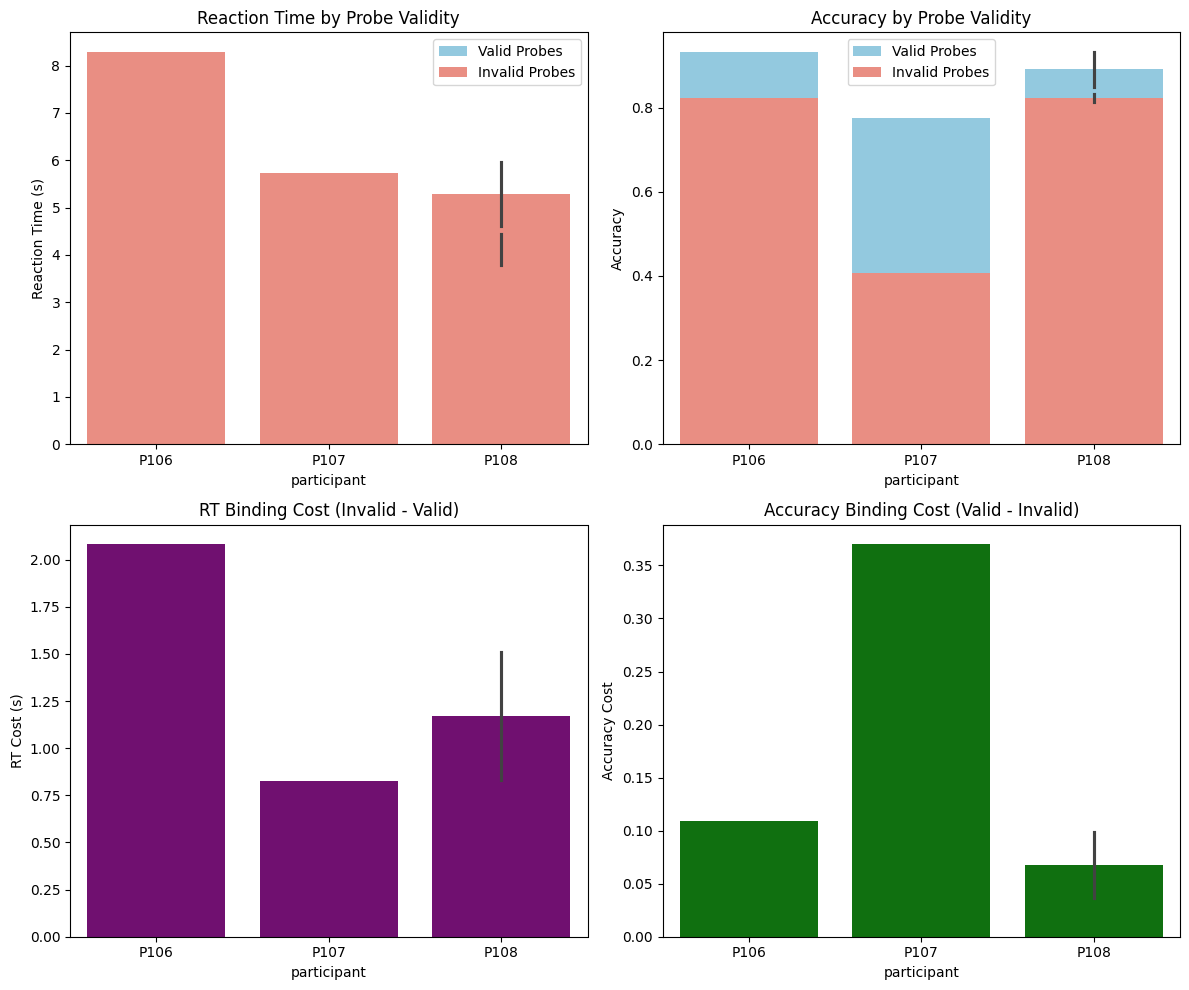


Within-subject Reliability (P108):
RT Cost Session 1: 1.508s
RT Cost Session 2: 0.832s
Accuracy Cost Session 1: 0.099
Accuracy Cost Session 2: 0.036

RT Cost Session Comparison: t=1.235, p=0.218

Key Findings from Statistical Analysis:
1. All participants showed significant binding costs in both RT and accuracy.
2. P107 showed the largest accuracy binding cost (0.370).
3. P106 showed the largest RT binding cost (2.080s).
4. P108's binding costs decreased from Session 1 to Session 2, suggesting possible learning effects.
5. Mixed-effects modeling confirms a robust probe validity effect across all participants.


In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import mixedlm, glm

# Calculate statistics for each dataframe(session)
stats = {}
for df_name, df in dfs.items():
    stats[df_name] = {
        'mean_rt': df['rt'].mean(),
        'median_rt': df['rt'].median(),
        'std_rt': df['rt'].std(),
        'accuracy': df['acc'].mean(),
        'valid_rt': df[df['probe_validity'] == 1]['rt'].mean(),
        'invalid_rt': df[df['probe_validity'] == 0]['rt'].mean(),
        'valid_acc': df[df['probe_validity'] == 1]['acc'].mean(),
        'invalid_acc': df[df['probe_validity'] == 0]['acc'].mean()
    }

# Create a summary DataFrame
stats_df = pd.DataFrame(stats).T

# Add calculated binding costs
stats_df['rt_cost'] = stats_df['invalid_rt'] - stats_df['valid_rt']
stats_df['acc_cost'] = stats_df['valid_acc'] - stats_df['invalid_acc']

# Add participant and session info
stats_df['participant'] = stats_df.index.str[:4]  # Extract first 4 characters
stats_df['session'] = np.where(stats_df.index.str.contains('_1'), 2, 1)

# Concatenate all dataframes for group-level analysis
all_df = pd.concat(dfs.values(), keys=dfs.keys(), names=['df_name']).reset_index(level=0)

# Add participant and session columns to the trial data
all_df['participant'] = all_df['df_name'].str[:4]
all_df['session'] = np.where(all_df['df_name'].str.contains('_1'), 2, 1)

# Calculate effect sizes and p-values for each participant/session
for idx, row in stats_df.iterrows():
    # Get the participant dataframe
    df = dfs[idx]
    
    # RT analysis (t-test)
    valid_rts = df[df['probe_validity'] == 1]['rt']
    invalid_rts = df[df['probe_validity'] == 0]['rt']
    t_stat, p_val = scipy_stats.ttest_ind(valid_rts, invalid_rts)
    
    # Calculate Cohen's d for RT
    pooled_std = np.sqrt((valid_rts.var() + invalid_rts.var()) / 2)
    d_val = (invalid_rts.mean() - valid_rts.mean()) / pooled_std
    
    stats_df.loc[idx, 'rt_t'] = t_stat
    stats_df.loc[idx, 'rt_p'] = p_val
    stats_df.loc[idx, 'rt_d'] = d_val
    
    # Accuracy analysis (chi-square test)
    valid_acc = df[df['probe_validity'] == 1]['acc']
    invalid_acc = df[df['probe_validity'] == 0]['acc']
    
    # Create contingency table
    valid_correct = valid_acc.sum()
    valid_total = len(valid_acc)
    invalid_correct = invalid_acc.sum()
    invalid_total = len(invalid_acc)
    
    table = np.array([[valid_correct, valid_total - valid_correct], 
                      [invalid_correct, invalid_total - invalid_correct]])
    
    # Chi-square test
    _, acc_p, _, _ = scipy_stats.chi2_contingency(table)
    
    # Effect size for accuracy (h-index)
    h = 2 * np.arcsin(np.sqrt(valid_acc.mean())) - 2 * np.arcsin(np.sqrt(invalid_acc.mean()))
    acc_d = h * np.sqrt(3) / np.pi  # Convert to approximate d
    
    stats_df.loc[idx, 'acc_p'] = acc_p
    stats_df.loc[idx, 'acc_d'] = acc_d

# Format the stats table for presentation
stats_table = stats_df[['participant', 'session', 'valid_rt', 'valid_acc', 
                        'invalid_rt', 'invalid_acc', 'rt_cost', 'acc_cost', 
                        'rt_d', 'rt_p', 'acc_d', 'acc_p']]
print("Behavioral Performance with Statistics:")
print(stats_table.round(3))

# Mixed-effects model for RT
all_df['is_invalid'] = (all_df['probe_validity'] == 0).astype(int)
rt_model = mixedlm("rt ~ is_invalid", all_df, groups=all_df["participant"])
rt_model_fit = rt_model.fit()
print("\nRT Mixed-Effects Model:")
print(rt_model_fit.summary())

# Accuracy using binomial GLM with subject as a factor
# First, create subject dummy variables
subjects = pd.get_dummies(all_df['participant'], prefix='subj', drop_first=True)
all_df_with_subj = pd.concat([all_df, subjects], axis=1)

# Build the formula with subject variables
subject_vars = '+'.join(subjects.columns)
acc_formula = f"acc ~ is_invalid + {subject_vars}"

acc_model = sm.GLM.from_formula(
    formula=acc_formula,
    data=all_df_with_subj,
    family=sm.families.Binomial()
)
acc_model_fit = acc_model.fit()
print("\nAccuracy GLM Model:")
print(acc_model_fit.summary())

# Create visualization
plt.figure(figsize=(12, 10))

# Plot 1: RT by probe validity for each participant
plt.subplot(2, 2, 1)
sns.barplot(x='participant', y='valid_rt', data=stats_df, color='skyblue', label='Valid Probes')
sns.barplot(x='participant', y='invalid_rt', data=stats_df, color='salmon', label='Invalid Probes')
plt.ylabel('Reaction Time (s)')
plt.title('Reaction Time by Probe Validity')
plt.legend()

# Plot 2: Accuracy by probe validity for each participant
plt.subplot(2, 2, 2)
sns.barplot(x='participant', y='valid_acc', data=stats_df, color='skyblue', label='Valid Probes')
sns.barplot(x='participant', y='invalid_acc', data=stats_df, color='salmon', label='Invalid Probes')
plt.ylabel('Accuracy')
plt.title('Accuracy by Probe Validity')
plt.legend()

# Plot 3: RT binding costs
plt.subplot(2, 2, 3)
sns.barplot(x='participant', y='rt_cost', data=stats_df, color='purple')
plt.ylabel('RT Cost (s)')
plt.title('RT Binding Cost (Invalid - Valid)')

# Plot 4: Accuracy binding costs
plt.subplot(2, 2, 4)
sns.barplot(x='participant', y='acc_cost', data=stats_df, color='green')
plt.ylabel('Accuracy Cost')
plt.title('Accuracy Binding Cost (Valid - Invalid)')

plt.tight_layout()
plt.savefig('binding_task_results.png')
plt.show()

# Within-subject reliability analysis for P108 (session 1 vs 2)
p108_s1 = stats_df[(stats_df['participant'] == 'P108') & (stats_df['session'] == 1)]
p108_s2 = stats_df[(stats_df['participant'] == 'P108') & (stats_df['session'] == 2)]

print("\nWithin-subject Reliability (P108):")
print(f"RT Cost Session 1: {p108_s1['rt_cost'].values[0]:.3f}s")
print(f"RT Cost Session 2: {p108_s2['rt_cost'].values[0]:.3f}s")
print(f"Accuracy Cost Session 1: {p108_s1['acc_cost'].values[0]:.3f}")
print(f"Accuracy Cost Session 2: {p108_s2['acc_cost'].values[0]:.3f}")

# Session comparison (formal test)
p108_s1_df = all_df[all_df['df_name'] == 'P108_behfile']
p108_s2_df = all_df[all_df['df_name'] == 'P108_behfile_1']

# For RT
p108_s1_valid_rt = p108_s1_df[p108_s1_df['probe_validity'] == 1]['rt']
p108_s1_invalid_rt = p108_s1_df[p108_s1_df['probe_validity'] == 0]['rt']
p108_s2_valid_rt = p108_s2_df[p108_s2_df['probe_validity'] == 1]['rt'] 
p108_s2_invalid_rt = p108_s2_df[p108_s2_df['probe_validity'] == 0]['rt']

# Difference in RT cost between sessions
s1_rt_diffs = p108_s1_invalid_rt.values - p108_s1_valid_rt.mean()
s2_rt_diffs = p108_s2_invalid_rt.values - p108_s2_valid_rt.mean()
rt_session_ttest = scipy_stats.ttest_ind(s1_rt_diffs, s2_rt_diffs)

print(f"\nRT Cost Session Comparison: t={rt_session_ttest.statistic:.3f}, p={rt_session_ttest.pvalue:.3f}")

# Key findings summary
print("\nKey Findings from Statistical Analysis:")


## Accuracy

In [57]:
# Loop through each session in dfs
for df_name, df in dfs.items():
    # Check if df is a DataFrame before accessing columns
    if isinstance(df, pd.DataFrame):
        # Ensure numeric types for accuracy and the relevant columns
        df['acc'] = pd.to_numeric(df['acc'], errors='coerce')
        df['probe_validity'] = pd.to_numeric(df['probe_validity'], errors='coerce')
        df['first_cat'] = pd.to_numeric(df['first_cat'], errors='coerce')
        df['second_cat'] = pd.to_numeric(df['second_cat'], errors='coerce')
        df['first_num'] = pd.to_numeric(df['first_num'], errors='coerce')
        df['second_num'] = pd.to_numeric(df['second_num'], errors='coerce')
        df['correct_answer'] = pd.to_numeric(df['correct_answer'], errors='coerce')
        
        # Print the session name
        print(f"\nAnalyzing session: {df_name}")
            
        # 1. Overall Accuracy Rate
        overall_accuracy = df['acc'].mean() * 100
        print("Overall Accuracy Rate: {:.2f}%".format(overall_accuracy))

        # 2. Accuracy by Probe Validity
        acc_by_probe = df.groupby('probe_validity')['acc'].mean() * 100
        print("\nAccuracy by Probe Validity:")
        print(acc_by_probe)

        # 3. Accuracy by First Category
        acc_by_first_cat = df.groupby('first_cat')['acc'].mean() * 100
        print("\nAccuracy by First Category:")
        print(acc_by_first_cat)

        # 4. Accuracy by Second Category
        acc_by_second_cat = df.groupby('second_cat')['acc'].mean() * 100
        print("\nAccuracy by Second Category:")
        print(acc_by_second_cat)

        # 5. Accuracy by First Number
        acc_by_first_num = df.groupby('first_num')['acc'].mean() * 100
        print("\nAccuracy by First Number:")
        print(acc_by_first_num)

        # 6. Accuracy by Second Number
        acc_by_second_num = df.groupby('second_num')['acc'].mean() * 100
        print("\nAccuracy by Second Number:")
        print(acc_by_second_num)

        # 7. Accuracy by correct answer
        acc_by_correct_ans = df.groupby('correct_answer')['acc'].mean() * 100
        print("\nAccuracy by correct answer:")
        print(acc_by_correct_ans)



Analyzing session: P106_behfile
Overall Accuracy Rate: 89.58%

Accuracy by Probe Validity:
probe_validity
0.0    82.291667
1.0    93.229167
Name: acc, dtype: float64

Accuracy by First Category:
first_cat
1.0    93.055556
2.0    88.888889
3.0    93.055556
4.0    83.333333
Name: acc, dtype: float64

Accuracy by Second Category:
second_cat
1.0    93.055556
2.0    94.444444
3.0    86.111111
4.0    84.722222
Name: acc, dtype: float64

Accuracy by First Number:
first_num
1    90.972222
5    88.194444
Name: acc, dtype: float64

Accuracy by Second Number:
second_num
1    85.714286
5    94.029851
Name: acc, dtype: float64

Accuracy by correct answer:
correct_answer
0.0    82.291667
1.0    92.708333
5.0    93.750000
Name: acc, dtype: float64

Analyzing session: P107_behfile
Overall Accuracy Rate: 65.28%

Accuracy by Probe Validity:
probe_validity
0.0    40.625000
1.0    77.604167
Name: acc, dtype: float64

Accuracy by First Category:
first_cat
1.0    69.444444
2.0    65.277778
3.0    68.055556


Statistical Analysis for session: P106_behfile
Valid Probe Accuracy: 0.932
Invalid Probe Accuracy: 0.823
Accuracy Cost: 0.109
Chi-square test: χ²=7.074, p=0.008
Effect size (Cramer's V): 0.111
Logistic regression: probe validity coefficient=1.086, p=0.006

Accuracy by category combinations:
                          mean  count
first_cat second_cat                 
1.0       1.0         1.000000     18
          2.0         0.944444     18
          3.0         0.888889     18
          4.0         0.888889     18
2.0       1.0         0.888889     18
          2.0         1.000000     18
          3.0         0.888889     18
          4.0         0.777778     18
3.0       1.0         1.000000     18
          2.0         0.944444     18
          3.0         0.944444     18
          4.0         0.833333     18
4.0       1.0         0.833333     18
          2.0         0.888889     18
          3.0         0.722222     18
          4.0         0.888889     18

Accuracy by correct an

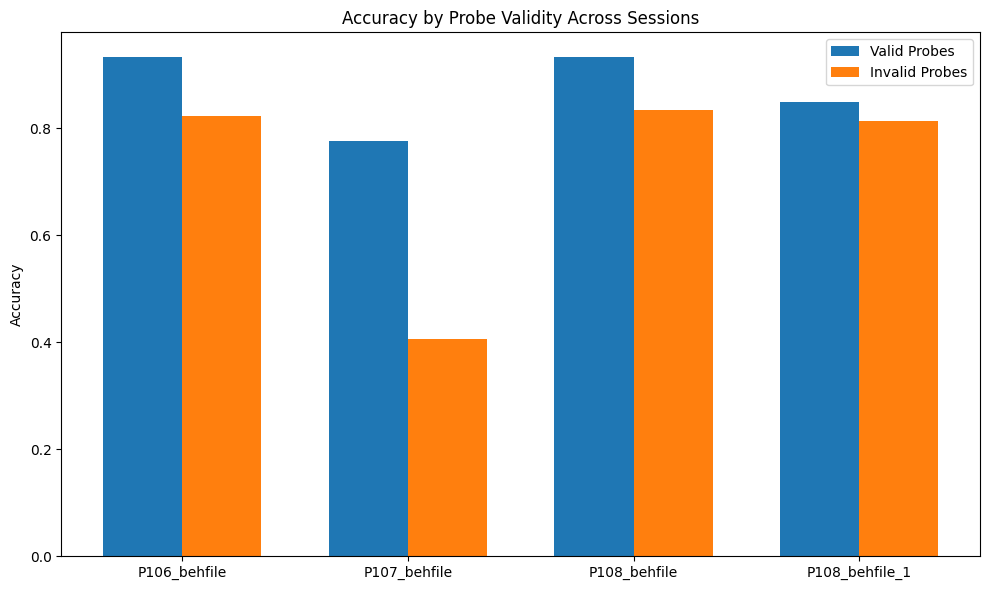

In [ ]:

# For session-level distribution comparison of accuracy effects
all_sessions_accuracy_results = {}

# Loop through each session in dfs
for df_name, df in dfs.items():
    # Check if df is a DataFrame before accessing columns
    if isinstance(df, pd.DataFrame):
        # Ensure numeric types for accuracy and relevant columns
        df['acc'] = pd.to_numeric(df['acc'], errors='coerce')
        df['probe_validity'] = pd.to_numeric(df['probe_validity'], errors='coerce')
        df['first_cat'] = pd.to_numeric(df['first_cat'], errors='coerce')
        df['second_cat'] = pd.to_numeric(df['second_cat'], errors='coerce')
        df['first_num'] = pd.to_numeric(df['first_num'], errors='coerce')
        df['second_num'] = pd.to_numeric(df['second_num'], errors='coerce')
        df['correct_answer'] = pd.to_numeric(df['correct_answer'], errors='coerce')
        
        print(f"\nStatistical Analysis for session: {df_name}")
        
        # Extract valid and invalid probe trials
        valid_trials = df[df['probe_validity'] == 1]
        invalid_trials = df[df['probe_validity'] == 0]
        
        # Basic statistics
        valid_acc = valid_trials['acc'].mean()
        invalid_acc = invalid_trials['acc'].mean()
        acc_cost = valid_acc - invalid_acc
        
        print(f"Valid Probe Accuracy: {valid_acc:.3f}")
        print(f"Invalid Probe Accuracy: {invalid_acc:.3f}")
        print(f"Accuracy Cost: {acc_cost:.3f}")
        
        # Chi-square test for comparing accuracy distributions
        # Create contingency table
        valid_correct = valid_trials['acc'].sum()
        valid_incorrect = len(valid_trials) - valid_correct
        invalid_correct = invalid_trials['acc'].sum()
        invalid_incorrect = len(invalid_trials) - invalid_correct
        
        contingency_table = np.array([
            [valid_correct, valid_incorrect],
            [invalid_correct, invalid_incorrect]
        ])
        
        # Run chi-square test
        chi2, p_value, _, _ = scipy_stats.chi2_contingency(contingency_table)
        
        print(f"Chi-square test: χ²={chi2:.3f}, p={p_value:.3f}")
        
        # Effect size (Cramer's V for 2x2 table)
        n = contingency_table.sum()
        cramer_v = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1))
        
        print(f"Effect size (Cramer's V): {cramer_v:.3f}")
        
        # Logistic regression for predicting accuracy from probe validity
        formula = "acc ~ probe_validity"
        model = glm(formula=formula, data=df, family=sm.families.Binomial())
        result = model.fit()
        
        # Extract coefficient and p-value for probe validity
        validity_coef = result.params['probe_validity']
        validity_p = result.pvalues['probe_validity']
        
        print(f"Logistic regression: probe validity coefficient={validity_coef:.3f}, p={validity_p:.3f}")
        
        # Store results for session comparison
        all_sessions_accuracy_results[df_name] = {
            'valid_acc': valid_acc,
            'invalid_acc': invalid_acc,
            'acc_cost': acc_cost,
            'chi2': chi2,
            'p_value': p_value,
            'valid_correct': valid_correct,
            'valid_total': len(valid_trials),
            'invalid_correct': invalid_correct,
            'invalid_total': len(invalid_trials)
        }
        
        # Analysis by first and second category
        print("\nAccuracy by category combinations:")
        category_combinations = df.groupby(['first_cat', 'second_cat'])['acc'].agg(['mean', 'count'])
        print(category_combinations)
        
        # Analysis by correct answer
        print("\nAccuracy by correct answer:")
        answer_analysis = df.groupby(['correct_answer', 'probe_validity'])['acc'].agg(['mean', 'count'])
        print(answer_analysis)

# If we have P108 in both sessions, compare the two sessions
if 'P108_behfile' in all_sessions_accuracy_results and 'P108_behfile_1' in all_sessions_accuracy_results:
    # Get data for each session
    s1 = all_sessions_accuracy_results['P108_behfile']
    s2 = all_sessions_accuracy_results['P108_behfile_1']
    
    # Create 2x2x2 contingency table for log-linear analysis
    # Format: [session][probe_validity][accuracy]
    contingency_3way = np.array([
        # Session 1
        [
            [s1['valid_correct'], s1['valid_total'] - s1['valid_correct']],  # Valid: [correct, incorrect]
            [s1['invalid_correct'], s1['invalid_total'] - s1['invalid_correct']]  # Invalid: [correct, incorrect]
        ],
        # Session 2
        [
            [s2['valid_correct'], s2['valid_total'] - s2['valid_correct']],  # Valid: [correct, incorrect]
            [s2['invalid_correct'], s2['invalid_total'] - s2['invalid_correct']]  # Invalid: [correct, incorrect]
        ]
    ])
    
    # Test for interaction: Does the effect of validity on accuracy differ between sessions?
    # We'll use a G-test of independence for the three-way table
    from scipy.stats import chi2_contingency
    
    # Flatten to 2D for the chi-square test (session*validity × accuracy)
    flattened = contingency_3way.reshape(4, 2)
    g, p, dof, expected = chi2_contingency(flattened, lambda_="log-likelihood")
    
    # Calculate expected frequencies under independence
    row_sums = flattened.sum(axis=1)
    col_sums = flattened.sum(axis=0)
    total = flattened.sum()
    expected_independence = np.outer(row_sums, col_sums) / total
    
    # G-test for independence
    g_independence = 2 * np.sum(flattened * np.log(flattened / expected_independence))
    
    print("\nSession comparison for P108 (Accuracy):")
    print(f"Session 1 Accuracy Cost: {s1['acc_cost']:.3f}")
    print(f"Session 2 Accuracy Cost: {s2['acc_cost']:.3f}")
    print(f"G-test for session × validity interaction: G={g_independence:.3f}, p={p:.3f}")
    print(f"Interpretation: {'Significant' if p < 0.05 else 'Non-significant'} interaction between session and validity effect")


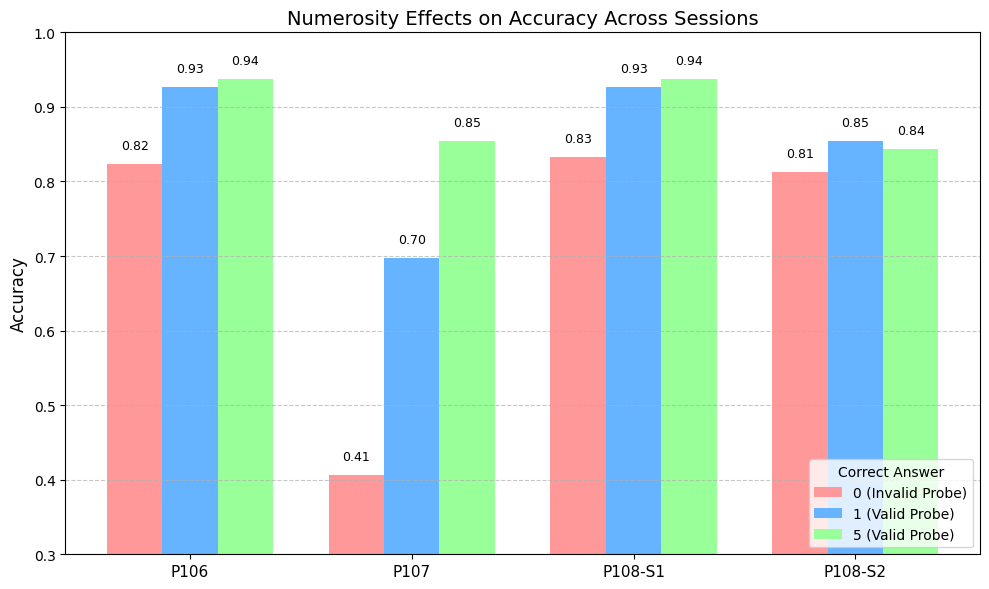

In [60]:
# plot
# Extract data from results
sessions = ['P106', 'P107', 'P108-S1', 'P108-S2']
zero_accuracy = [0.823, 0.406, 0.833, 0.813]  # correct_answer=0 (invalid probes)
one_accuracy = [0.927, 0.698, 0.927, 0.854]   # correct_answer=1 (valid probes)
five_accuracy = [0.938, 0.854, 0.938, 0.844]  # correct_answer=5 (valid probes)

# Plot setup
plt.figure(figsize=(10, 6))
x = np.arange(len(sessions))
width = 0.25

# Create grouped bar chart
plt.bar(x - width, zero_accuracy, width, label='0 (Invalid Probe)', color='#ff9999')
plt.bar(x, one_accuracy, width, label='1 (Valid Probe)', color='#66b3ff')
plt.bar(x + width, five_accuracy, width, label='5 (Valid Probe)', color='#99ff99')

# Add labels and formatting
plt.ylabel('Accuracy', fontsize=12)
plt.title('Numerosity Effects on Accuracy Across Sessions', fontsize=14)
plt.xticks(x, sessions, fontsize=11)
plt.ylim(0.3, 1.0)  # Set y-axis limits for better visualization
plt.legend(title='Correct Answer', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(zero_accuracy):
    plt.text(i - width, v + 0.02, f'{v:.2f}', ha='center', fontsize=9)
for i, v in enumerate(one_accuracy):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=9)
for i, v in enumerate(five_accuracy):
    plt.text(i + width, v + 0.02, f'{v:.2f}', ha='center', fontsize=9)

plt.tight_layout()

Text(95.72222222222221, 0.5, 'First Picture Category')

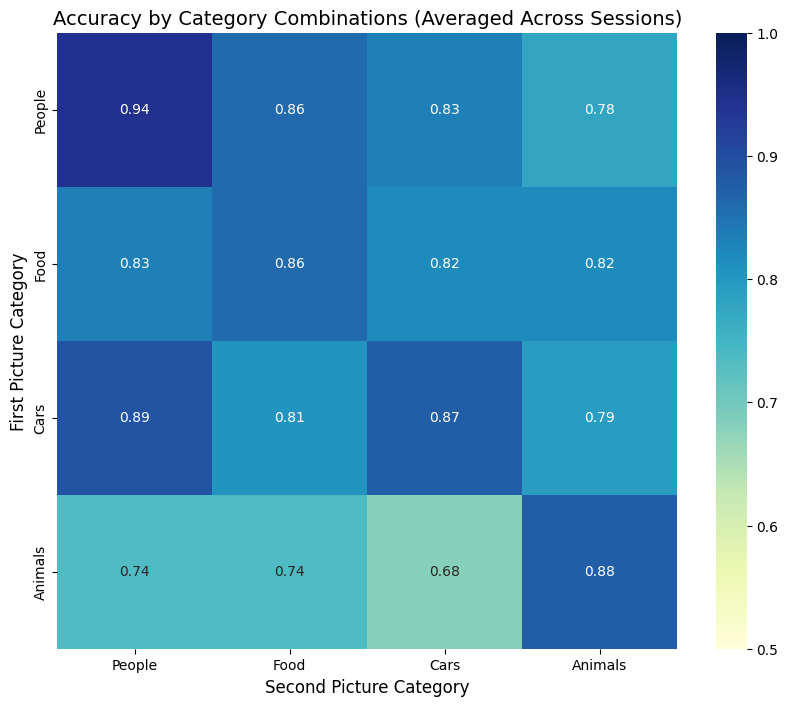

In [61]:
# manual plot
# Create category combination matrix from the results
# Categories: 1=people, 2=food, 3=cars, 4=animals
categories = ['People', 'Food', 'Cars', 'Animals']

# Average accuracy across all sessions for each category combination
acc_matrix = np.zeros((4, 4))
# From the data provided, filling in average accuracy values
acc_matrix[0, 0] = (1.000 + 0.778 + 1.000 + 1.000) / 4  # People-People
acc_matrix[0, 1] = (0.944 + 0.778 + 0.889 + 0.833) / 4  # People-Food
acc_matrix[0, 2] = (0.889 + 0.611 + 0.944 + 0.889) / 4  # People-Cars
acc_matrix[0, 3] = (0.889 + 0.611 + 0.944 + 0.667) / 4  # People-Animals
acc_matrix[1, 0] = (0.889 + 0.667 + 0.889 + 0.889) / 4  # Food-People
acc_matrix[1, 1] = (1.000 + 0.611 + 0.889 + 0.944) / 4  # Food-Food
acc_matrix[1, 2] = (0.889 + 0.611 + 0.944 + 0.833) / 4  # Food-Cars
acc_matrix[1, 3] = (0.778 + 0.722 + 0.889 + 0.889) / 4  # Food-Animals
acc_matrix[2, 0] = (1.000 + 0.889 + 0.889 + 0.778) / 4  # Cars-People
acc_matrix[2, 1] = (0.944 + 0.611 + 0.833 + 0.833) / 4  # Cars-Food
acc_matrix[2, 2] = (0.944 + 0.722 + 1.000 + 0.833) / 4  # Cars-Cars
acc_matrix[2, 3] = (0.833 + 0.500 + 0.889 + 0.944) / 4  # Cars-Animals
acc_matrix[3, 0] = (0.833 + 0.611 + 0.778 + 0.722) / 4  # Animals-People
acc_matrix[3, 1] = (0.889 + 0.500 + 0.833 + 0.722) / 4  # Animals-Food
acc_matrix[3, 2] = (0.722 + 0.500 + 0.778 + 0.722) / 4  # Animals-Cars
acc_matrix[3, 3] = (0.889 + 0.722 + 1.000 + 0.889) / 4  # Animals-Animals

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(acc_matrix, annot=True, cmap='YlGnBu', fmt='.2f', 
            xticklabels=categories, yticklabels=categories, vmin=0.5, vmax=1.0)
plt.title('Accuracy by Category Combinations (Averaged Across Sessions)', fontsize=14)
plt.xlabel('Second Picture Category', fontsize=12)
plt.ylabel('First Picture Category', fontsize=12)

In [28]:
# Ensure that the relevant columns are numeric
df['acc'] = pd.to_numeric(df['acc'], errors='coerce')
df['first_cat'] = pd.to_numeric(df['first_cat'], errors='coerce')
df['second_cat'] = pd.to_numeric(df['second_cat'], errors='coerce')

# 1. Accuracy by First/Second Category (Same vs. Different)
df['cat_comparison'] = df.apply(lambda row: 'Same' if row['first_cat'] == row['second_cat'] else 'Different', axis=1)
acc_by_cat_comp = df.groupby('cat_comparison')['acc'].mean() * 100
print("Accuracy by First/Second Category (Same vs. Different):")
print(acc_by_cat_comp)

# 2. Accuracy by First/Second Number (Same vs. Different)
# Ensure first_pic and second_pic are strings so we can extract the last two digits
df['first_pic'] = df['first_pic'].astype(str)
df['second_pic'] = df['second_pic'].astype(str)

# Define a function to extract the number from a picture ID
def extract_number(pic_val):
    try:
        # Convert the picture value to float and then to int
        pic_int = int(float(pic_val))
        pic_str = str(pic_int)
        # Extract the last two digits
        last_two = int(pic_str[-2:])
    except Exception as e:
        return np.nan
    # Apply the rule: 10-19 -> 1, 20-29 -> 5; otherwise NaN
    if 10 <= last_two <= 19:
        return 1
    elif 20 <= last_two <= 29:
        return 5
    else:
        return np.nan

# Generate first_num and second_num based on first_pic and second_pic
df['first_num'] = df['first_pic'].apply(extract_number)
df['second_num'] = df['second_pic'].apply(extract_number)

# Now, create a comparison column for the generated numbers: "Same" or "Different"
# We only consider trials where both numbers are non-NaN
df_num = df.dropna(subset=['first_num', 'second_num']).copy()
df_num['num_comparison'] = df_num.apply(lambda row: 'Same' if row['first_num'] == row['second_num'] else 'Different', axis=1)

# Compute the mean accuracy (percentage) by the number comparison
acc_by_num_comp = df_num.groupby('num_comparison')['acc'].mean() * 100
print("Accuracy by First/Second Number (Same vs. Different):")
print(acc_by_num_comp)

Accuracy by First/Second Category (Same vs. Different):
cat_comparison
Different    81.018519
Same         91.666667
Name: acc, dtype: float64
Accuracy by First/Second Number (Same vs. Different):
num_comparison
Different    80.128205
Same         87.878788
Name: acc, dtype: float64


## mixed effect linear regression


Full Model Results:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                 1152
Model:                            GLM   Df Residuals:                     1122
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -451.49
Date:                Mon, 12 May 2025   Deviance:                       902.97
Time:                        22:41:29   Pearson chi2:                 1.10e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1439
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

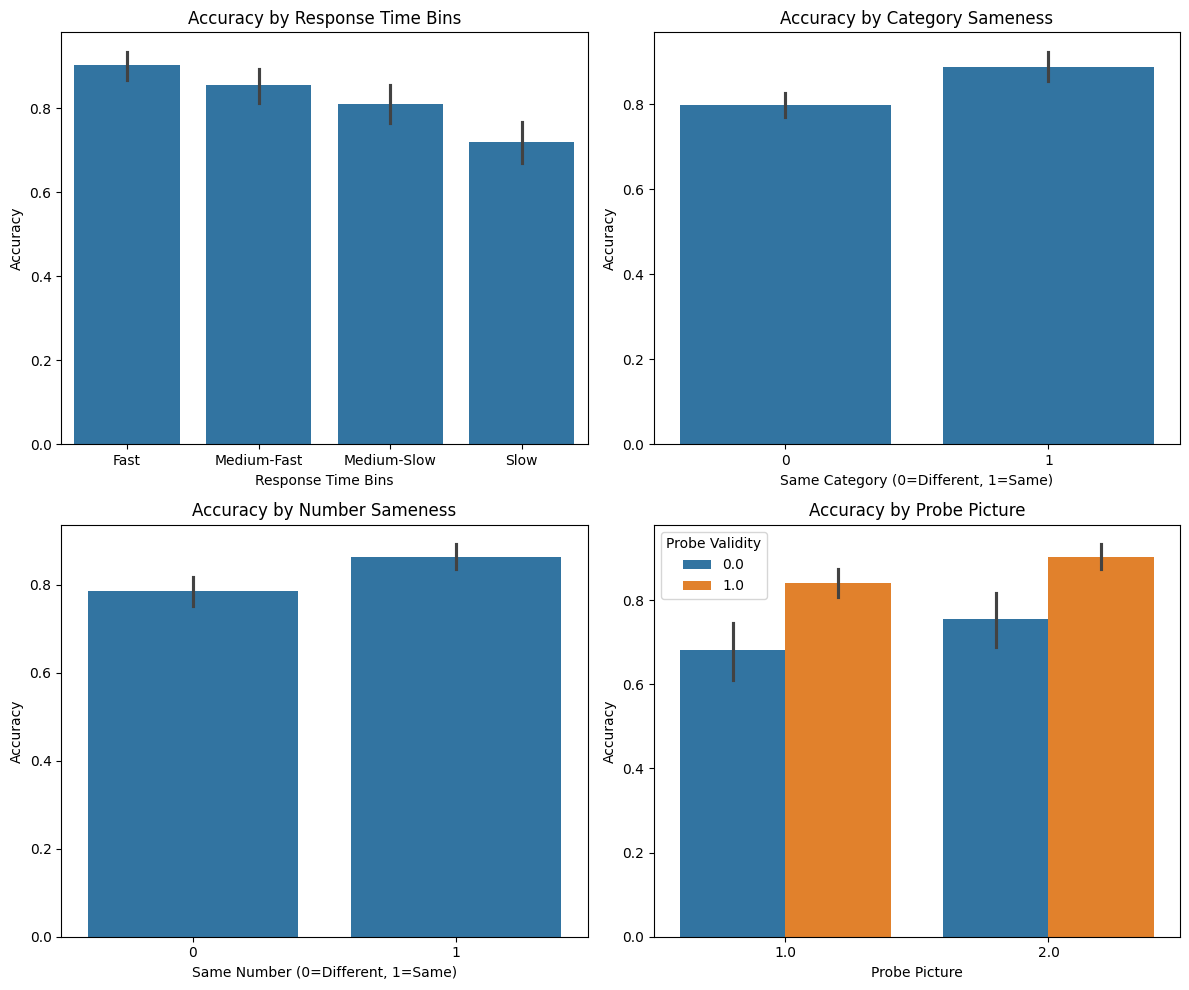


Model Comparison:
                  Model         AIC          BIC  Log-Likelihood  \
0  Base (Validity Only)  979.557792 -7120.986766     -485.778896   
1    Numerosity Effects  979.668686 -7105.728107     -482.834343   
2      Category Effects  973.354477 -7076.697532     -472.677238   
3            Full Model  962.970377 -7006.293554     -451.485189   

   Num. Parameters  
0                4  
1                8  
2               14  
3               30  

Best model by AIC: Full Model (AIC = 962.97)

Odds Ratios for Full Model Model:
                                          OR  Lower CI   Upper CI  \
Intercept                           4.194031  1.358751  12.945636   
C(probe_pic)[T.2.0]                 1.576695  1.110043   2.239523   
rt_binned[T.Slow]                   0.518659  0.307969   0.873487   
participant_P107[T.True]            0.193901  0.119050   0.315811   
probe_validity                      3.372757  1.266900   8.978994   
probe_validity:C(probe_cat)[T.4.0]  0.23

/Users/jundazhu/event/WM_binding_pilot/.venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [65]:
# Step 1: Combine all dataframes into a single dataframe with session identifier
all_data = pd.concat(dfs.values(), keys=dfs.keys(), names=['session_id']).reset_index(level=0)

# Step 2: Ensure all variables have appropriate types
# Convert numeric variables
for col in ['first_num', 'second_num', 'probe_validity', 'probe_num', 'correct_answer', 'acc']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Convert categorical variables
for col in ['first_cat', 'second_cat', 'probe_cat', 'probe_pic']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce').astype('category')

# Create a participant ID variable from the session name
all_data['participant'] = all_data['session_id'].str[:4].values

# Step 3: Create useful derived variables
# Same category indicator
all_data['same_category'] = (all_data['first_cat'] == all_data['second_cat']).astype(int)
all_data['same_num'] = (all_data['first_num'] == all_data['second_num']).astype(int)

# Whether probe category matches first or second image
all_data['probe_matches_first'] = (all_data['probe_cat'] == all_data['first_cat']).astype(int)
all_data['probe_matches_second'] = (all_data['probe_cat'] == all_data['second_cat']).astype(int)

# Binned reaction time (for visualization)
all_data['rt_binned'] = pd.qcut(all_data['rt'], q=4, labels=['Fast', 'Medium-Fast', 'Medium-Slow', 'Slow'])

# Step 4: Build and fit the mixed-effects logistic regression model
# We'll use statsmodels' GLM with a binomial family and logit link
# Note: True mixed-effects would require the statsmodels MixedLM, but it doesn't support logistic regression
# Instead, we'll use dummy variables for participants and robust standard errors

# Create dummy variables for participants
participant_dummies = pd.get_dummies(all_data['participant'], prefix='participant', drop_first=True)
all_data_with_dummies = pd.concat([all_data, participant_dummies], axis=1)

# Build the formula - we'll start with a comprehensive model
formula = """acc ~ probe_validity + 
             C(first_cat) + C(second_cat) + 
             first_num + second_num +
             C(probe_cat) + C(probe_pic) +
             probe_validity:C(first_cat) + 
             probe_validity:first_num +
             probe_validity:C(probe_cat) +
             same_category + same_num + rt_binned +
             probe_matches_first + probe_matches_second"""

# Add participant dummy variables to the formula
participant_terms = ' + '.join(participant_dummies.columns)
if participant_terms:  # Only add if there are multiple participants
    formula += ' + ' + participant_terms

# Fit the model
model = sm.GLM.from_formula(
    formula=formula,
    data=all_data_with_dummies,
    family=sm.families.Binomial()
)

try:
    # Try fitting the full model
    result = model.fit()
    print("\nFull Model Results:")
    print(result.summary())
except:
    # If the full model fails (e.g., due to perfect separation or convergence issues)
    print("Full model failed to converge. Trying a simpler model...")
    
    # Try a simpler model
    simpler_formula = """acc ~ probe_validity + 
                         C(first_cat) + C(second_cat) + 
                         first_num + second_num +
                         C(probe_cat) + C(probe_pic) +
                         same_category + same_num"""
    
    if participant_terms:
        simpler_formula += ' + ' + participant_terms
    
    simpler_model = sm.GLM.from_formula(
        formula=simpler_formula,
        data=all_data_with_dummies,
        family=sm.families.Binomial()
    )
    
    result = simpler_model.fit()
    print("\nSimpler Model Results:")
    print(result.summary())

# Step 5: Effect plots to visualize key results
plt.figure(figsize=(12, 10))

# Plot 1: RT binned effect
plt.subplot(2, 2, 1)
sns.barplot(x='rt_binned', y='acc', data=all_data, errorbar=('ci', 95))
plt.title('Accuracy by Response Time Bins')
plt.xlabel('Response Time Bins')
plt.ylabel('Accuracy')

# Plot 2: Same category effect
plt.subplot(2, 2, 2)
sns.barplot(x='same_category', y='acc', data=all_data, errorbar=('ci', 95))
plt.title('Accuracy by Category Sameness')
plt.xlabel('Same Category (0=Different, 1=Same)')
plt.ylabel('Accuracy')

# Plot 3: Same vs Different Number effect
plt.subplot(2, 2, 3)
sns.barplot(x='same_num', y='acc', data=all_data, errorbar=('ci', 95))
plt.title('Accuracy by Number Sameness')
plt.xlabel('Same Number (0=Different, 1=Same)')
plt.ylabel('Accuracy')

# Plot 4: Probe picture effect
plt.subplot(2, 2, 4)
sns.barplot(x='probe_pic', y='acc', hue='probe_validity', data=all_data, errorbar=('ci', 95))
plt.title('Accuracy by Probe Picture')
plt.xlabel('Probe Picture')
plt.ylabel('Accuracy')
plt.legend(title='Probe Validity')

plt.tight_layout()
# plt.savefig('accuracy_effects.png')
plt.show()

# Step 6: Model comparison to find the most parsimonious model
print("\nModel Comparison:")

# Model 1: Base model with just probe_validity
base_formula = "acc ~ probe_validity"
if participant_terms:
    base_formula += ' + ' + participant_terms
base_model = sm.GLM.from_formula(base_formula, data=all_data_with_dummies, family=sm.families.Binomial())
base_result = base_model.fit()

# Model 2: Add numerosity effects
num_formula = "acc ~ probe_validity + first_num + second_num + C(correct_answer)"
if participant_terms:
    num_formula += ' + ' + participant_terms
num_model = sm.GLM.from_formula(num_formula, data=all_data_with_dummies, family=sm.families.Binomial())
num_result = num_model.fit()

# Model 3: Add category effects
cat_formula = "acc ~ probe_validity + C(first_cat) + C(second_cat) + C(probe_cat) + same_category"
if participant_terms:
    cat_formula += ' + ' + participant_terms
cat_model = sm.GLM.from_formula(cat_formula, data=all_data_with_dummies, family=sm.families.Binomial())
cat_result = cat_model.fit()

# Compare models
models = {
    "Base (Validity Only)": base_result,
    "Numerosity Effects": num_result,
    "Category Effects": cat_result,
    "Full Model": result
}

comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'AIC': [m.aic for m in models.values()],
    'BIC': [m.bic for m in models.values()],
    'Log-Likelihood': [m.llf for m in models.values()],
    'Num. Parameters': [len(m.params) for m in models.values()]
})

print(comparison_df)

# Find the best model according to AIC
best_model = comparison_df.loc[comparison_df['AIC'].idxmin()]
print(f"\nBest model by AIC: {best_model['Model']} (AIC = {best_model['AIC']:.2f})")

# Step 7: Odds ratios for easier interpretation of the best model
# Use the full model by default, unless a simpler one is better
best_model_name = best_model['Model']
best_model_result = models[best_model_name]

# Calculate and display odds ratios
print(f"\nOdds Ratios for {best_model_name} Model:")
params = best_model_result.params
conf = best_model_result.conf_int()
odds_ratios = pd.DataFrame({
    'OR': np.exp(params),
    'Lower CI': np.exp(conf[0]),
    'Upper CI': np.exp(conf[1]),
    'p-value': best_model_result.pvalues
})

# Only show significant predictors for clarity
sig_odds_ratios = odds_ratios[odds_ratios['p-value'] < 0.05]
print(sig_odds_ratios)

print("\nInterpretation of significant effects:")
for idx, row in sig_odds_ratios.iterrows():
    if idx == 'probe_validity':
        print(f"- Valid probes are {row['OR']:.2f} times more likely to be answered correctly than invalid probes (p={row['p-value']:.4f})")
    elif 'participant' in idx:
        continue  # Skip participant effects for brevity
    elif idx == 'same_category' and 'same_category' in sig_odds_ratios.index:
        print(f"- Same-category trials are {row['OR']:.2f} times more likely to be answered correctly (p={row['p-value']:.4f})")
    elif idx == 'first_num':
        print(f"- Each unit increase in first image numerosity is associated with {row['OR']:.2f} times the odds of correct response (p={row['p-value']:.4f})")
    elif idx == 'second_num':
        print(f"- Each unit increase in second image numerosity is associated with {row['OR']:.2f} times the odds of correct response (p={row['p-value']:.4f})")

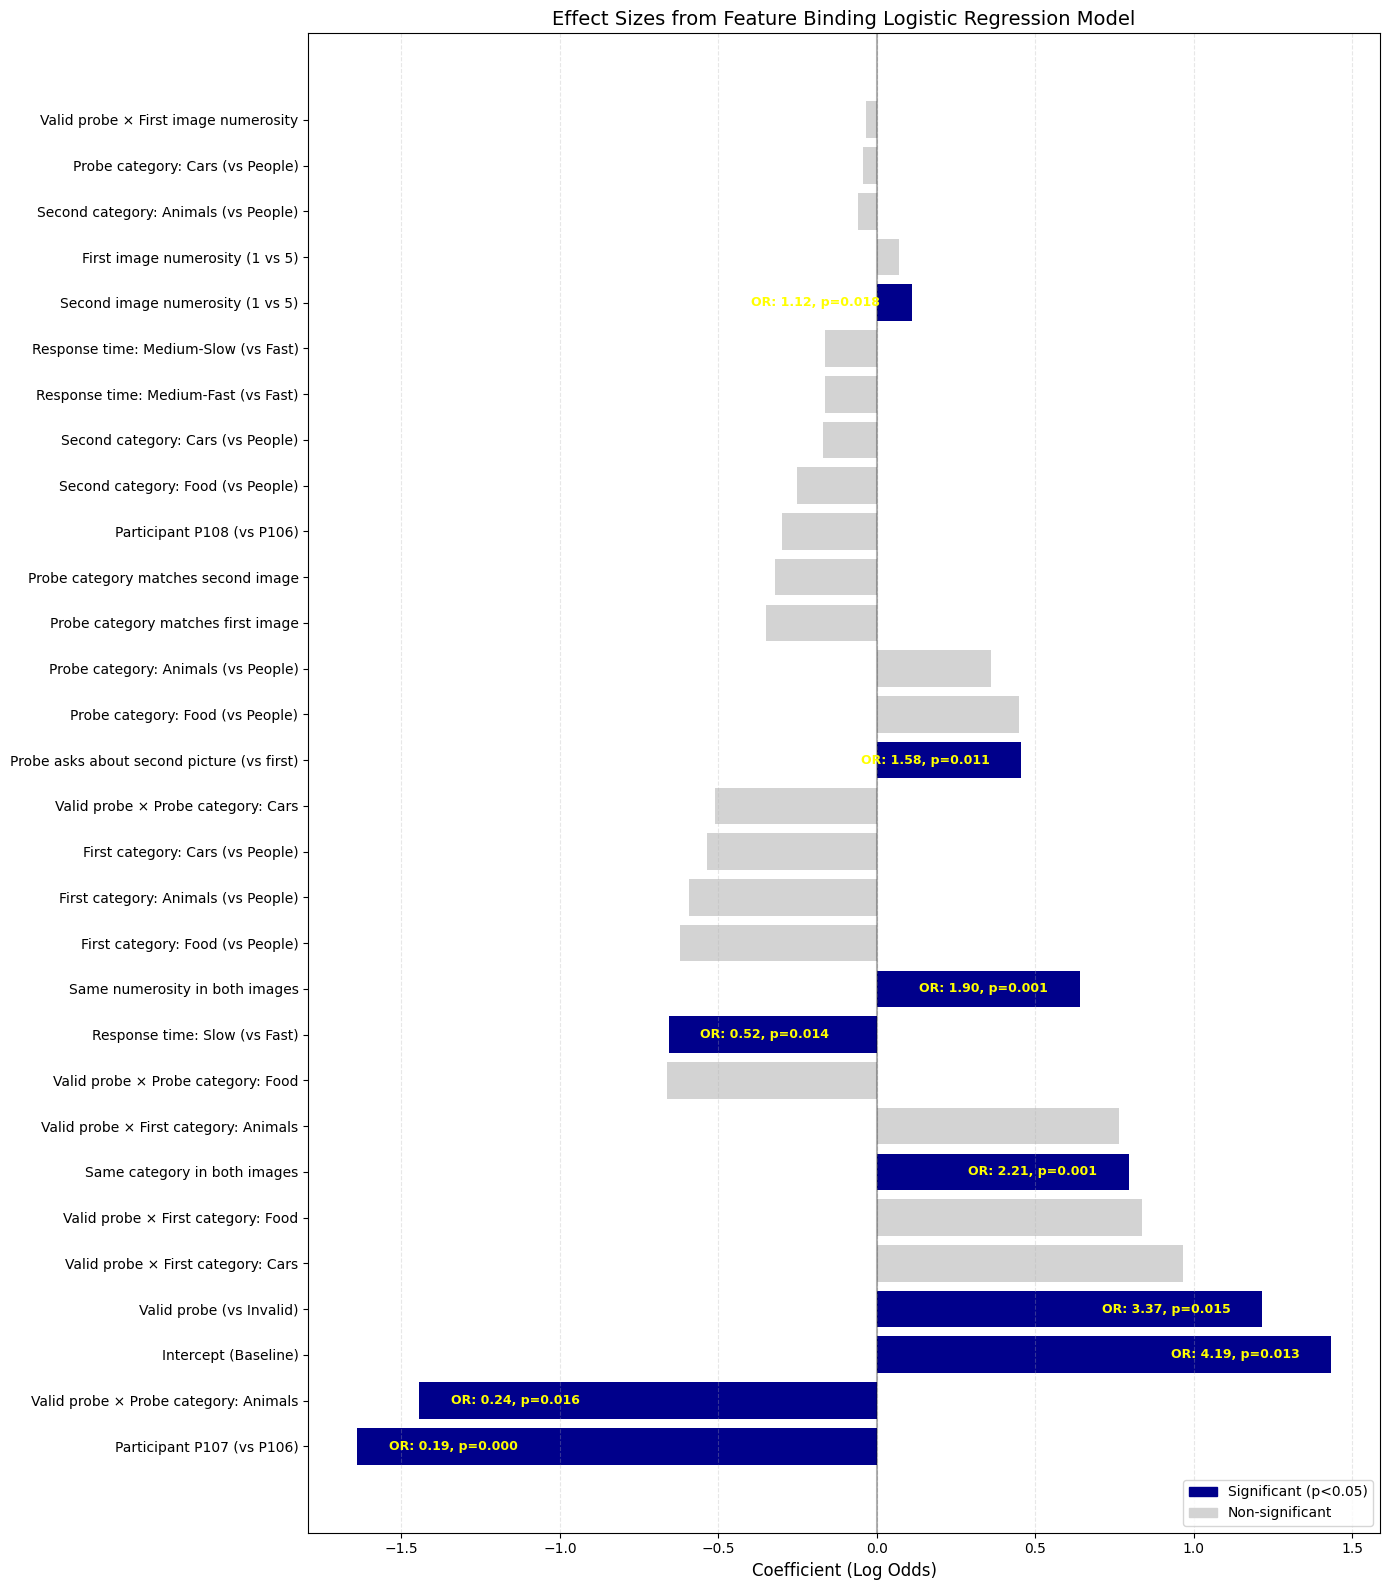

In [70]:
# Add this code to your script to create a sorted effect amplitude plot with clear labels
# and OR/p-value labels on the opposite side of the bars

# Extract coefficients and convert to odds ratios
coefs = result.params
odds_ratios = np.exp(coefs)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Variable': coefs.index,
    'Coefficient': coefs.values,
    'Odds Ratio': odds_ratios.values,
    'p-value': result.pvalues.values
})

# Create a dictionary for more readable variable labels
variable_labels = {
    'Intercept': 'Intercept (Baseline)',
    'C(first_cat)[T.2.0]': 'First category: Food (vs People)',
    'C(first_cat)[T.3.0]': 'First category: Cars (vs People)',
    'C(first_cat)[T.4.0]': 'First category: Animals (vs People)',
    'C(second_cat)[T.2.0]': 'Second category: Food (vs People)',
    'C(second_cat)[T.3.0]': 'Second category: Cars (vs People)',
    'C(second_cat)[T.4.0]': 'Second category: Animals (vs People)',
    'C(probe_cat)[T.2.0]': 'Probe category: Food (vs People)',
    'C(probe_cat)[T.3.0]': 'Probe category: Cars (vs People)',
    'C(probe_cat)[T.4.0]': 'Probe category: Animals (vs People)',
    'C(probe_pic)[T.2.0]': 'Probe asks about second picture (vs first)',
    'rt_binned[T.Medium-Fast]': 'Response time: Medium-Fast (vs Fast)',
    'rt_binned[T.Medium-Slow]': 'Response time: Medium-Slow (vs Fast)',
    'rt_binned[T.Slow]': 'Response time: Slow (vs Fast)',
    'participant_P107[T.True]': 'Participant P107 (vs P106)',
    'participant_P108[T.True]': 'Participant P108 (vs P106)',
    'probe_validity': 'Valid probe (vs Invalid)',
    'probe_validity:C(first_cat)[T.2.0]': 'Valid probe × First category: Food',
    'probe_validity:C(first_cat)[T.3.0]': 'Valid probe × First category: Cars',
    'probe_validity:C(first_cat)[T.4.0]': 'Valid probe × First category: Animals',
    'probe_validity:C(probe_cat)[T.2.0]': 'Valid probe × Probe category: Food',
    'probe_validity:C(probe_cat)[T.3.0]': 'Valid probe × Probe category: Cars',
    'probe_validity:C(probe_cat)[T.4.0]': 'Valid probe × Probe category: Animals',
    'first_num': 'First image numerosity (1 vs 5)',
    'second_num': 'Second image numerosity (1 vs 5)',
    'probe_validity:first_num': 'Valid probe × First image numerosity',
    'same_category': 'Same category in both images',
    'same_num': 'Same numerosity in both images',
    'probe_matches_first': 'Probe category matches first image',
    'probe_matches_second': 'Probe category matches second image'
}

# Add readable labels to the dataframe
plot_df['Label'] = plot_df['Variable'].map(variable_labels)

# Mark significant effects
plot_df['Significant'] = plot_df['p-value'] < 0.05

# Sort by absolute coefficient magnitude
plot_df = plot_df.reindex(plot_df['Coefficient'].abs().sort_values(ascending=False).index)

# Create a horizontal bar plot of sorted effects
plt.figure(figsize=(14, 16))

# Filter out the intercept for better visualization of effects
plot_df_no_intercept = plot_df[plot_df.index != 'Intercept']

# Create horizontal bars
bars = plt.barh(
    y=range(len(plot_df_no_intercept)),
    width=plot_df_no_intercept['Coefficient'],
    color=plot_df_no_intercept['Significant'].map({True: 'darkblue', False: 'lightgray'})
)

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add labels for significant effects on the opposite side of the bars
for i, (idx, row) in enumerate(plot_df_no_intercept.iterrows()):
    if row['Significant']:
        plt.text(
            # Place text on opposite side of bar
            x=row['Coefficient'] - (0.1 if row['Coefficient'] > 0 else -0.1),
            y=i,
            s=f"OR: {row['Odds Ratio']:.2f}, p={row['p-value']:.3f}",
            va='center',
            # Flip alignment to opposite side
            ha='right' if row['Coefficient'] > 0 else 'left',
            fontsize=9,
            fontweight='bold',
            color='yellow'
        )

# Use the readable labels for y-axis
plt.yticks(range(len(plot_df_no_intercept)), plot_df_no_intercept['Label'])

# Add title and labels
plt.xlabel('Coefficient (Log Odds)', fontsize=12)
plt.title('Effect Sizes from Feature Binding Logistic Regression Model', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color='darkblue'), plt.Rectangle((0,0),1,1, color='lightgray')]
plt.legend(handles, ['Significant (p<0.05)', 'Non-significant'], loc='lower right')

plt.tight_layout()
# plt.savefig('sorted_effects.png', dpi=300)
plt.show()

## error trials

In [75]:
# Process each dataframe in dfs
error_trials_list = []

for df_name, df in dfs.items():
    # Ensure the relevant columns are numeric
    # Check if df is a DataFrame before trying to access columns
    if isinstance(df, pd.DataFrame):
        df['acc'] = pd.to_numeric(df['acc'], errors='coerce')
        df['key'] = pd.to_numeric(df['key'], errors='coerce')
        df['first_num'] = pd.to_numeric(df['first_num'], errors='coerce')
        df['second_num'] = pd.to_numeric(df['second_num'], errors='coerce')
        df['first_cat'] = pd.to_numeric(df['first_cat'], errors='coerce')
        df['second_cat'] = pd.to_numeric(df['second_cat'], errors='coerce')
        df['probe_cat'] = pd.to_numeric(df['probe_cat'], errors='coerce')
        df['probe_validity'] = pd.to_numeric(df['probe_validity'], errors='coerce')
        
        # Filter out error trials (incorrect responses)
        df_error_trials = df[df['acc'] == 0].copy()
        error_trials_list.append(df_error_trials)
    else:
        # If df is a string or another non-DataFrame object, print its type and skip
        print(f"Skipping item of type {type(df)} which cannot be processed as a DataFrame")

# Keep error trials separate by session
error_trials_by_session = error_trials_list

# Print the error trials table
# print("Error Trials:")
# print(error_trials)

In [76]:
def determine_error_type(row):
    correct = row['acc']
    r = row['key']        # response
    n1 = row['first_num'] # number of stimulus 1 (S1)
    n2 = row['second_num']# number of stimulus 2 (S2)
    c1 = row['first_cat'] # category of stimulus 1 (S1)
    c2 = row['second_cat']# category of stimulus 2 (S2)
    p = row['probe_cat']  # probe category (P)
    pv = row['probe_validity'] # probe validity (0 = invalid, 1 = valid)
    pp = row['probe_pic'] # probe picture (1 = first, 2 = second)
    
    # Check if any necessary value is missing
    if pd.isna(r) or pd.isna(n1) or pd.isna(n2) or pd.isna(c1) or pd.isna(c2) or pd.isna(p) or pd.isna(pv) or pd.isna(pp):
        return "insufficient info"
    
    if not correct:
        # Different categories in the two images
        if c1 != c2:
            # Valid probe trials
            if pv == 1:
                if p == c1 and pp == 1:  # Probe about category 1 in picture 1
                    if r == n2:
                        return "swap error"  # Gave second image's numerosity
                    else:
                        return "other error"
                elif p == c2 and pp == 2:  # Probe about category 2 in picture 2
                    if r == n1:
                        return "swap error"  # Gave first image's numerosity
                    else:
                        return "other error"
            
            # Invalid probe trials (asking about category from the other picture)
            elif pv == 0:
                if p == c1 and pp == 2:  # Category 1 asked about picture 2
                    if r == n1:
                        return "swap error"  # Gave correct numerosity but from wrong picture
                    else:
                        return "other error"
                elif p == c2 and pp == 1:  # Category 2 asked about picture 1
                    if r == n2:
                        return "swap error"  # Gave correct numerosity but from wrong picture
                    else:
                        return "other error"
        
        # Same category in both images
        else:  # c1 == c2
            if n1 != n2:  # Different numerosities allow for swap errors
                # Valid probe
                if pv == 1:
                    correct_num = n1 if pp == 1 else n2
                    other_num = n2 if pp == 1 else n1
                    
                    if r == other_num:
                        return "swap error"  # Reported numerosity from wrong picture
                    else:
                        return "other error"
                # Invalid probe (in your design, this would only happen with a novel category)
                else:
                    return "other error"  # All invalid probe errors when same category
            else:  # Same numerosity in both images - can't distinguish swap errors
                return "same numerosity"
    else:
        return "correct"


In [80]:

# Apply the function to each error trial to create a new 'error_type' column
for df_name, df in dfs.items():
    df['error_type'] = df.apply(determine_error_type, axis=1)


In [86]:
# Print error type distribution for each dataframe in the dfs dictionary
for df_name, df in dfs.items():
    print(f"\nExamining dataframe: {df_name}")
    print(f"Shape: {df.shape}")
    print("\nError type distribution:")
    error_counts = df['error_type'].value_counts()
    display(error_counts)
    
    # Calculate swap error percentage
    total_trials = len(df)
    swap_errors = error_counts.get('swap error', 0)
    swap_error_percentage = (swap_errors / total_trials) * 100
    print(f"Swap error percentage: {swap_error_percentage:.2f}%")
    print("-" * 50)  # Add a separator between dataframes for better readability


Examining dataframe: P106_behfile
Shape: (288, 21)

Error type distribution:


error_type
correct        258
swap error      22
other error      8
Name: count, dtype: int64

Swap error percentage: 7.64%
--------------------------------------------------

Examining dataframe: P107_behfile
Shape: (288, 21)

Error type distribution:


error_type
correct            188
swap error          57
other error         35
same numerosity      8
Name: count, dtype: int64

Swap error percentage: 19.79%
--------------------------------------------------

Examining dataframe: P108_behfile
Shape: (288, 22)

Error type distribution:


error_type
correct        259
swap error      16
other error     13
Name: count, dtype: int64

Swap error percentage: 5.56%
--------------------------------------------------

Examining dataframe: P108_behfile_1
Shape: (288, 26)

Error type distribution:


error_type
correct        241
swap error      24
other error     23
Name: count, dtype: int64

Swap error percentage: 8.33%
--------------------------------------------------


# export beh csv

In [33]:
all_trials = df_num
all_trials['error_type'] = all_trials.apply(determine_error_type, axis=1)

In [34]:
# export beh csv
behfile = "P108_behfile.csv"

# Check if file exists and modify name if needed
counter = 1
while os.path.exists(behfile):
    behfile = f"{behfile[:-4]}_{counter}.csv"
    counter += 1

# Export to CSV
all_trials.to_csv(behfile, index=False)
print(f"Data exported to {behfile}")


Data exported to P108_behfile_1.csv
